Final Project from https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-o

Objective:
Test different supervised ML techniques to determine which one provides the best results in predicting whether a mammographic mass is benign or malignant.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

Input Data:
We will use the Mammographic Mass Data Set from UCI: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

In [46]:
import pandas

input_file = "mammographic_masses.data"
headers = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity']
df = pandas.read_csv(input_file, na_values = ['?'], names = headers)

In [47]:
df.tail()

,BI-RADS,age,shape,margin,density,severity
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1
960,4.0,62.0,3.0,3.0,3.0,0


In [48]:
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [49]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   830 non-null    float64
 1   age       830 non-null    float64
 2   shape     830 non-null    float64
 3   margin    830 non-null    float64
 4   density   830 non-null    float64
 5   severity  830 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


In [51]:
features = df[['age', 'shape', 'margin', 'density']].values
classes = df['severity'].values

In [52]:
features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [53]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [54]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(0)

(X_train, X_test, y_train, y_test) = train_test_split(scaled_features, classes, train_size=0.8)

In [55]:
X_train

array([[ 1.17425775,  0.98104077,  1.39618483,  0.24046607],
       [-0.12152594,  0.98104077,  1.39618483,  0.24046607],
       [-2.5084959 ,  0.17563638, -1.157718  ,  0.24046607],
       ...,
       [ 0.49226634,  0.98104077,  0.75770912,  0.24046607],
       [-0.25792422, -1.43517241, -1.157718  ,  0.24046607],
       [ 0.62866462,  0.17563638,  0.75770912,  0.24046607]])

In [58]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(random_state=1)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
# 1- Decision Tree Score with single train/test split
all_scores = {}
score_dt_single_split = classifier.score(X_test, y_test)
print(score_dt_single_split)
all_scores["score_dt_single_split"] = score_dt_single_split

0.7228915662650602


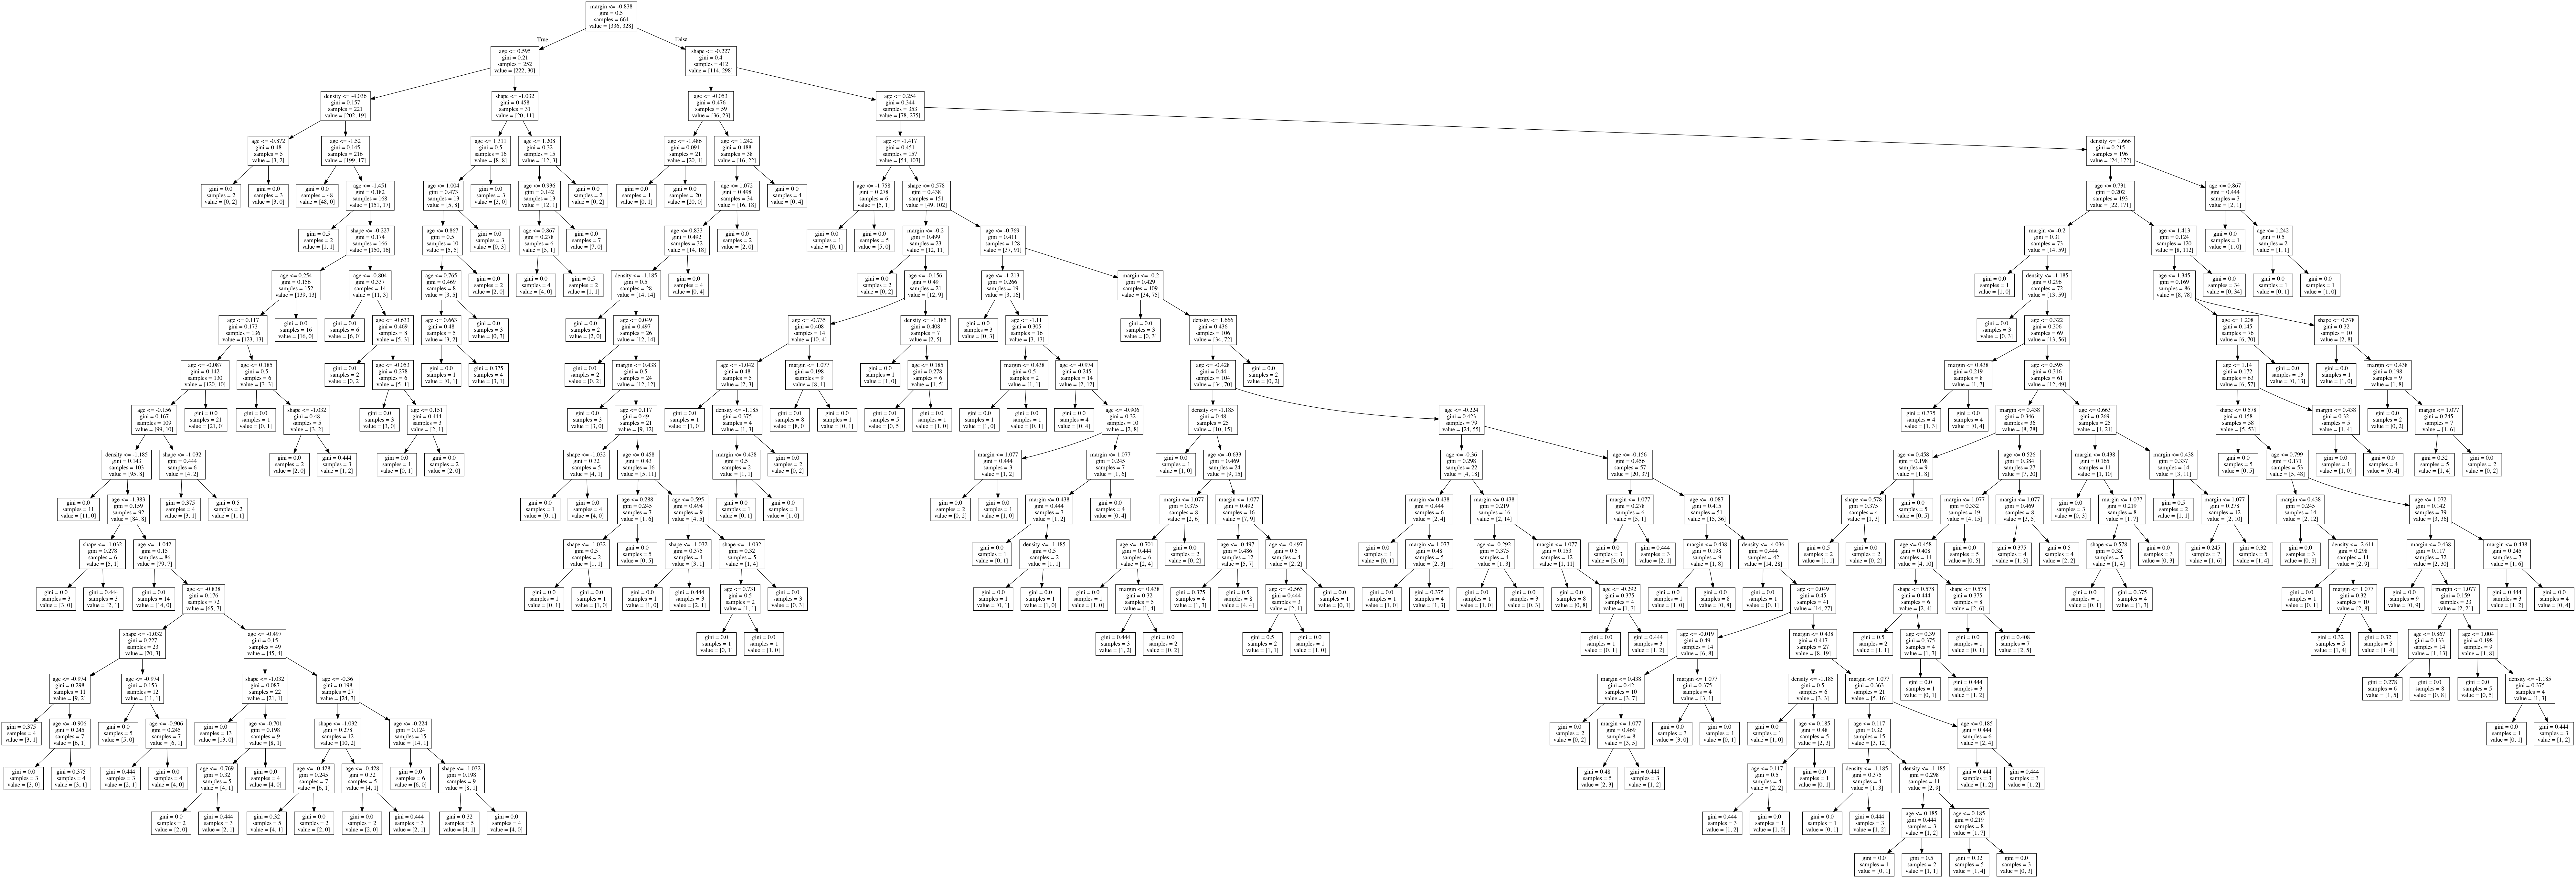

In [60]:
from IPython.display import Image  
from six import StringIO
import pydotplus

feature_names = ['age', 'shape', 'margin', 'density']
dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names=feature_names)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
from sklearn.model_selection import cross_val_score
# K-Fold cross validation
# Input our DecisionTree model, the entire scaled features dataset with
# real target values.
# K = number of folds - data will be split into K randomly assigned segments
# One segment will be reserved for testing and K-1 will be used for training

K = 20 # Number of folds
cv_scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_dt_kfold = cv_scores.mean()
print(score_dt_kfold)
all_scores["score_dt_kfold"] = score_dt_kfold

0.7710511033681767


In [62]:
# What should be the best K value
import operator
avg_scores = {}
top_k = 10 # Calculate based on dataset len
for num in range(2, top_k):
    cv_scores = cross_val_score(classifier, scaled_features, classes, cv=num)
    cv_mean = cv_scores.mean()
    avg_scores[num] = cv_mean
    print("Iteration {0}: mean {1}".format(num, cv_mean))

K = max(avg_scores.items(), key=operator.itemgetter(1))[0]
print("Maximum score = {0}, when K = {1}".format(avg_scores[K], K))

Iteration 2: mean 0.6819277108433734
Iteration 3: mean 0.7096435236052251
Iteration 4: mean 0.7156726124117428
Iteration 5: mean 0.7253012048192771
Iteration 6: mean 0.7337521287317971
Iteration 7: mean 0.7288847742486826
Iteration 8: mean 0.7397894884241971
Iteration 9: mean 0.73728637473378
Maximum score = 0.7397894884241971, when K = 8


In [63]:
# Now let's test Support Vector Machines (SVM)

In [64]:
from sklearn import svm

# RBF
classifier = svm.SVC(kernel='rbf')
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_svm_rbf = scores.mean()
all_scores["score_svm_rbf"] = score_svm_rbf
print("Score for rbf SVM: {0}".format(score_svm_rbf))

# Linear
classifier = svm.SVC(kernel='linear')
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_svm_linear = scores.mean()
all_scores["score_svm_linear"] = score_svm_linear
print("Score for linear SVM: {0}".format(score_svm_linear))

# Poly
degree = 3
classifier = svm.SVC(kernel='poly', degree=degree)
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_svm_3rd_poly = scores.mean()
all_scores["score_svm_3rd_poly"] = score_svm_3rd_poly
print("Score for SVM poly with degree {0}: {1}".format(degree, score_svm_3rd_poly))

# Sigmoid
classifier = svm.SVC(kernel='sigmoid', degree=degree)
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_svm_sigmoid = scores.mean()
all_scores["score_svm_sigmoid"] = score_svm_sigmoid
print("Score for sigmoid SVM: {0}".format(score_svm_sigmoid))


Score for rbf SVM: 0.8084624719940254
Score for linear SVM: 0.7952296489917849
Score for SVM poly with degree 3: 0.7916005414488424
Score for sigmoid SVM: 0.7518787341299477


In [65]:
# Now let's try K-Nearest-Neighbors (KNN)
from sklearn import neighbors
N = 10
K = 10
classifier = neighbors.KNeighborsClassifier(n_neighbors=N)
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_10_KNN = scores.mean()
all_scores["score_10_KNN"] = score_10_KNN
print("Score for KNN with {0} neighbors: {1}".format(N, score_10_KNN))


Score for KNN with 10 neighbors: 0.7915662650602409


In [21]:
# Now let's try Naive Bayes
from sklearn.naive_bayes import MultinomialNB
scaler = preprocessing.MinMaxScaler()

minmax_scaled_features = scaler.fit_transform(features)

In [66]:
classifier = MultinomialNB()
scores = cross_val_score(classifier, minmax_scaled_features, classes, cv=K)
score_naive_bayes = scores.mean()
all_scores["score_naive_bayes"] = score_naive_bayes
print("Score for Naive Bayes: {0}".format(score_naive_bayes))


Score for Naive Bayes: 0.7855421686746988


In [67]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_logistic_reg = scores.mean()
all_scores["score_logistic_reg"] = score_logistic_reg
print("Score for Logistic Regression: {0}".format(score_logistic_reg))


Score for Logistic Regression: 0.8072289156626505


In [68]:
# Linear Regression
# Confirm this is going to be a bad performer as this is a binary classification
# problem
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
scores = cross_val_score(classifier, scaled_features, classes, cv=K)
score_linear_reg = scores.mean()
all_scores["score_linear_reg"] = score_linear_reg
print("Score for Linear Regression: {0}".format(score_linear_reg))


Score for Linear Regression: 0.4029016226042388


In [69]:
# Neural Networks
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    # 4 features, 8 unit layer
    model.add(Dense(8, input_dim=4, activation='relu', kernel_initializer='normal'))
    model.add(Dense(4, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
cv_scores = cross_val_score(estimator, scaled_features, classes, cv=K)
score_NN = cv_scores.mean()
all_scores["score_NN"] = score_NN
score_NN


0.8024096369743348

In [80]:
# Who is the winner??
import operator
for k, v in sorted(all_scores.items(), key=operator.itemgetter(1), reverse=True):
    print ("{0}: {1}".format(k, v)) 


score_svm_rbf: 0.8084624719940254
score_logistic_reg: 0.8072289156626505
score_NN: 0.8024096369743348
score_svm_linear: 0.7952296489917849
score_svm_3rd_poly: 0.7916005414488424
score_10_KNN: 0.7915662650602409
score_naive_bayes: 0.7855421686746988
score_dt_kfold: 0.7710511033681767
score_svm_sigmoid: 0.7518787341299477
score_dt_single_split: 0.7228915662650602
score_linear_reg: 0.4029016226042388
